# 4. 파이토치 기본
## 4.2 역전파 - 선형회귀식

In [1]:
import torch
from matplotlib import pyplot as plt

In [2]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5,1)
num_features = x.shape[1]
print(x)
print(y)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
tensor([[0.1222],
        [2.0829],
        [4.1832],
        [6.9289],
        [8.4913]])


In [3]:
print(x.shape, y.shape)

torch.Size([5, 1]) torch.Size([5, 1])


In [4]:
#dtype = torch.FloatTensor
#W = Variable(torch.randn(num_features, 1), requires_grad=True)
#b = Variable(torch.randn(1), requires_grad=True)
w = torch.randn(num_features, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [5]:
learning_rate = 1e-3
optimizer = torch.optim.SGD([w, b], lr=learning_rate)

In [6]:
print(w.shape, b.shape)

torch.Size([1, 1]) torch.Size([1])


In [7]:
loss_stack = []
for epoch in range(1001):
    
    optimizer.zero_grad()
    
    y_hat = torch.matmul(x, w) + b
    loss = torch.mean((y_hat-y)**2)
    
    loss.backward()
    optimizer.step() 
    loss_stack.append(loss.item())
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:112.9120864868164
Epoch 100:8.387399673461914
Epoch 200:1.2704559564590454
Epoch 300:0.7174311876296997
Epoch 400:0.6144329905509949
Epoch 500:0.5491213202476501
Epoch 600:0.49291664361953735
Epoch 700:0.44315648078918457
Epoch 800:0.3990047574043274
Epoch 900:0.35982272028923035
Epoch 1000:0.3250513970851898


In [8]:
with torch.no_grad():
    y_hat = torch.matmul(x, w) + b

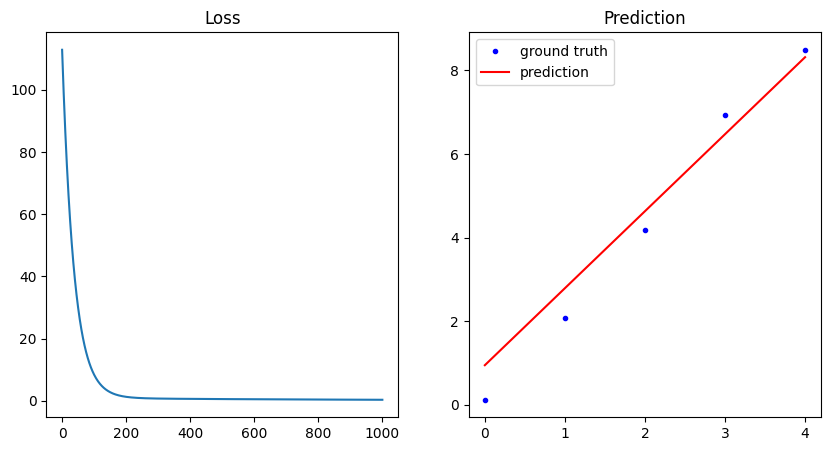

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x, y,'.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()